In [1]:
import sys
import numpy as np
sys.path.append("..")
sys.path.append("../sage")

# 1. Tensor to voigt conversion and voigt to tensor conversion

In [2]:
import tensor_conversion

In [3]:
cij_forsterite = np.array([[320.5,  68.15,  71.6,     0,     0,     0],
  [ 68.15,  196.5,  76.8,     0,     0,     0],
  [  71.6,   76.8, 233.5,     0,     0,     0],
  [   0,      0,      0,     64,     0,     0],
  [   0,      0,      0,      0,    77,     0],
  [   0,      0,      0,      0,     0,  78.7]])

cij_opx = np.array([[  236.90,   79.60,   63.20,    0.00,    0.00,    0.00],
  [    79.60,  180.50,   56.80,    0.00,    0.00,    0.00],
  [    63.20,   56.80,  230.40,    0.00,    0.00,    0.00],
  [     0.00,    0.00,    0.00,   84.30,    0.00,    0.00],
  [     0.00,    0.00,    0.00,    0.00,   79.40,    0.00],
  [     0.00,    0.00,    0.00,    0.00,    0.00,   80.10]])
cij_cpx = np.array([[  228.10,   78.80,   70.20,    0.00,    7.90,    0.00],
  [    78.80,  181.10,   61.10,    0.00,    5.90,    0.00],
  [    70.20,   61.10,  245.40,    0.00,   39.70,    0.00],
  [     0.00,    0.00,    0.00,   78.90,    0.00,    6.40],
  [     7.90,    5.90,   39.70,    0.00,   68.20,    0.00],
  [     0.00,    0.00,    0.00,    6.40,    0.00,   78.10]])

In [4]:
rho_fo = 3355
rho_opx = 3306
rho_cpx = 3286

In [5]:
cij = cij_forsterite
density = rho_fo

In [6]:
tensor = tensor_conversion.voigt_to_tensor(cij)

print(np.array(tensor))

[[[[320.5    0.     0.  ]
   [  0.    68.15   0.  ]
   [  0.     0.    71.6 ]]

  [[  0.    78.7    0.  ]
   [ 78.7    0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.    77.  ]
   [  0.     0.     0.  ]
   [ 77.     0.     0.  ]]]


 [[[  0.    78.7    0.  ]
   [ 78.7    0.     0.  ]
   [  0.     0.     0.  ]]

  [[ 68.15   0.     0.  ]
   [  0.   196.5    0.  ]
   [  0.     0.    76.8 ]]

  [[  0.     0.     0.  ]
   [  0.     0.    64.  ]
   [  0.    64.     0.  ]]]


 [[[  0.     0.    77.  ]
   [  0.     0.     0.  ]
   [ 77.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.    64.  ]
   [  0.    64.     0.  ]]

  [[ 71.6    0.     0.  ]
   [  0.    76.8    0.  ]
   [  0.     0.   233.5 ]]]]


In [7]:
voigt = tensor_conversion.tensor_to_voigt(tensor)

In [8]:
print(np.array(voigt))

print(voigt == cij)

[[320.5   68.15  71.6    0.     0.     0.  ]
 [ 68.15 196.5   76.8    0.     0.     0.  ]
 [ 71.6   76.8  233.5    0.     0.     0.  ]
 [  0.     0.     0.    64.     0.     0.  ]
 [  0.     0.     0.     0.    77.     0.  ]
 [  0.     0.     0.     0.     0.    78.7 ]]
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [9]:
cijkl = tensor_conversion.voigt_to_tensor(voigt)
print(np.array(cijkl))
print(cijkl == tensor)

[[[[320.5    0.     0.  ]
   [  0.    68.15   0.  ]
   [  0.     0.    71.6 ]]

  [[  0.    78.7    0.  ]
   [ 78.7    0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.    77.  ]
   [  0.     0.     0.  ]
   [ 77.     0.     0.  ]]]


 [[[  0.    78.7    0.  ]
   [ 78.7    0.     0.  ]
   [  0.     0.     0.  ]]

  [[ 68.15   0.     0.  ]
   [  0.   196.5    0.  ]
   [  0.     0.    76.8 ]]

  [[  0.     0.     0.  ]
   [  0.     0.    64.  ]
   [  0.    64.     0.  ]]]


 [[[  0.     0.    77.  ]
   [  0.     0.     0.  ]
   [ 77.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.    64.  ]
   [  0.    64.     0.  ]]

  [[ 71.6    0.     0.  ]
   [  0.    76.8    0.  ]
   [  0.     0.   233.5 ]]]]
True


# 2. Tensor rotation

In [10]:
import tensor_rotation
import tensor_rotation_opt
import tensor_conversion
from get_rotations import EulerAngles

In [11]:
ctfobj = EulerAngles("ebsd.ctf")
fors = ctfobj.get_euler_angles(2)
ens = ctfobj.get_euler_angles(3)

density = ((rho_opx*len(fors)) + (rho_cpx*len(ens)))/(rho_opx + rho_cpx)
print(fors)

          Euler1    Euler2    Euler3
0        87.4642   92.8881  189.4273
1        87.3722   92.8697  189.8949
2        88.0216   93.0424  189.4486
3        87.4349   92.8845  190.2057
4        87.5331   92.9261  189.5653
...          ...       ...       ...
1394633  84.6656  116.6140  205.8327
1394634  84.4332  116.7462  205.0268
1394635  84.6351  116.8354  205.1278
1394636  84.9668  117.0409  204.6467
1394637  80.3672  118.6418  202.7304

[1394638 rows x 3 columns]


In [12]:
cij = cij_opx

In [13]:
tensor_list = []
tensor = tensor_conversion.voigt_to_tensor(cij)
counter = 0
for i in range(len(fors)):
    alpha = fors.iloc[i]["Euler1"]
    beta = fors.iloc[i]["Euler2"]
    gamma = fors.iloc[i]["Euler3"]
    output = np.array(tensor_rotation_opt.rotate_tensor(tensor, alpha, beta, gamma))
#     print(output)
#     print(f"Counter: {counter}")
#     counter +=1
    tensor_list.append(output)

In [14]:
cij = cij_cpx

In [15]:
tensor = tensor_conversion.voigt_to_tensor(cij)
counter = 0
for i in range(len(ens)):
    alpha = ens.iloc[i]["Euler1"]
    beta = ens.iloc[i]["Euler2"]
    gamma = ens.iloc[i]["Euler3"]
    output = np.array(tensor_rotation_opt.rotate_tensor(tensor, alpha, beta, gamma))
    tensor_list.append(output)

In [16]:
tensor_sum = np.sum(tensor_list, axis=0)
tensor_sum= tensor_sum/(len(fors) + len(ens))

In [17]:
# import numpy as np
# import pandas as pd

# tensor = tensor_conversion.voigt_to_tensor(cij_forsterite)

# alpha = 30 # Rotation angle around x axis in degrees
# beta = 50 # Rotation angle around y axis in degrees
# gamma = 80    # Rotation angle around z axis in degrees
# output = tensor_rotation.rotate_tensor(tensor, alpha, beta, gamma)

In [18]:
print(np.shape(tensor_sum))

(3, 3, 3, 3)


In [19]:
import pandas as pd
print("Output rotated tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(tensor_sum))))

Output rotated tensor in voigt matrix convention:
            0           1           2          3          4          5
0  223.887166   66.256115   64.412732   0.295863  -0.650064  -0.942141
1   66.256115  220.913125   68.244539  -0.107111   0.690837  -0.603394
2   64.412732   68.244539  215.330200   0.581704  -0.911253   1.609356
3    0.295863   -0.107111    0.581704  75.396951  -0.676783  -0.374681
4   -0.650064    0.690837   -0.911253  -0.676783  77.793011  -0.281251
5   -0.942141   -0.603394    1.609356  -0.374681  -0.281251  78.453771


# 3. Calculating Christoffel tensors

In [20]:
import christoffel

In [21]:
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])
# M = tensor_sum
# import tensor_conversion
# tensor_M = tensor_conversion.voigt_to_tensor(M)
stiffness = tensor_sum
direction = np.array([1, 0, 0])
density = density
christoffel_t = christoffel.christoffel_tensor(stiffness, direction)
wave_moduli, velocities, polarization_directions = christoffel.wave_properties(christoffel_t, density)
print("Christoffel tensor:")
print(christoffel_t)
print("Wave moduli:")
print(wave_moduli)
print("Velocities:")
print(velocities)
print("Polarization directions:")
print(polarization_directions)

Direction:  [1. 0. 0.]
Christoffel tensor:
[[223.88716574  -0.9421412   -0.65006411]
 [ -0.9421412   78.45377086  -0.28125144]
 [ -0.65006411  -0.28125144  77.79301059]]
Wave moduli:
[223.89614489430193, 78.55429900170378, 77.68350329400083]
Velocities:
[0.013942866272778454, 0.008258738837661858, 0.008212836092198151]
Polarization directions:
[[ 0.99996923 -0.00450751 -0.00641989]
 [-0.00646898 -0.93676543 -0.3498981 ]
 [-0.00443676  0.34992887 -0.93676577]]


# 4. Calculating velocity

In [22]:
import christoffel_wave_prop

In [23]:
import numpy as np
import tensor_conversion
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9
M = tensor_sum*10**9

cijkl = M
rho = density

# Calculate vp, vs1 and vs2 over all the directions possible
vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
# Print vp, vs1 and vs2
print("The values of vp are:")
print("Min Vp: ", min(vp)/1000)
print("Max Vp: ", max(vp)/1000)
print("The values of vs1 are:")
print("Min Vs1: ", min(vs1)/1000)
print("Max Vs1: ", max(vs1)/1000)
print("The values of vs2 are:")
print("Min Vs2: ", min(vs2)/1000)
print("Max Vs2: ", max(vs2)/1000)

The values of vp are:
Min Vp:  0.4319012395518442
Max Vp:  0.44198740581992
The values of vs1 are:
Min Vs1:  0.2595050758186114
Max Vs1:  0.26175315221419815
The values of vs2 are:
Min Vs2:  0.2540565297981525
Max Vs2:  0.26017273492085197


# 5. Anisotropy plot

In [24]:
density = ((rho_opx*len(fors)) + (rho_cpx*len(ens)))/(len(fors)+len(ens))

/Users/usin8611/Documents/code_sydney/codes_anisotropy/anisotropy/notebooks/../sage/cijkl_2dplots_vp.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels(['{:.1f}'.format(v) for v in cb.get_ticks()])


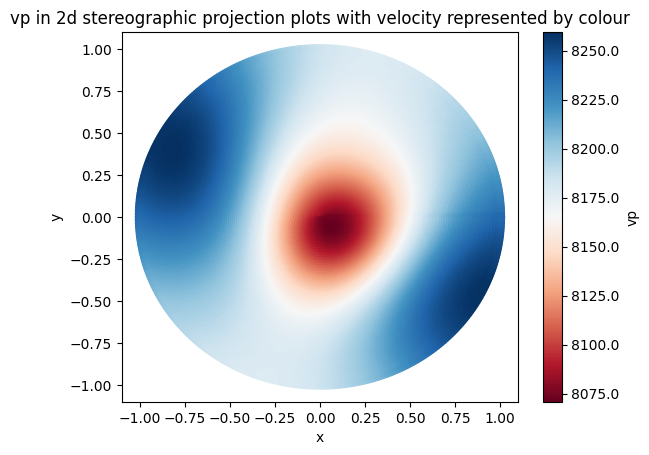

In [25]:
import tensor_conversion
# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
import cijkl_2dplots_vp
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9

M = tensor_sum*10**9

cijkl = M

rho = density

# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
cijkl_2dplots_vp.plot_vp_2d(cijkl, rho)

In [26]:
density

3298.117077002074